In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import geopandas as gpd

import sys  
sys.path.insert(0, './src')

import helper
import model

import sklearn.preprocessing
import sklearn.decomposition
import sklearn


from pymongo import MongoClient

In [2]:
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score, recall_score # evaluation metric

In [3]:
pwd

'/Users/bahar/Desktop/galvanize_Course/CaseStudy/fraud-detection-case-study'

In [4]:
main_df = pd.read_json('data/data.json')

In [108]:
main_df['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

### meanings:
0 : Not Fraud - 'premium' <br>1 : Maybe Fraud - 'spammer_warn', 'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock', 'tos_warn', 'fraudster_att', 'spammer_web', 'spammer' <br>2 : Fraud - 'fraudster_event', 'fraudster'

In [221]:
#main_df.head(2)

In [110]:
main_df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')

In [5]:
main_df.shape

(14337, 44)

In [350]:
df.head()

approx_payout_date  body_length  channels  country  currency  \
0          1266062400         3852         5       66         6   
1          1296720000         3499         0       66         6   
2          1296172800         2601         8       66         6   
3          1388966400        12347         6       31         2   
4          1297900800         2417        11       66         6   

   delivery_method  email_domain  event_created   event_end  event_published  \
0              0.0          2084     1262739706  1265630400     1.263110e+09   
1              1.0          4220     1293832670  1296288000     1.293833e+09   
2              1.0          4015     1291090956  1295740800     1.291092e+09   
3              1.0          2524     1360681570  1388534400     1.360683e+09   
4              0.0           444     1291994666  1297468800     1.291995e+09   

   event_start  fb_published      gts  has_analytics  has_header  has_logo  \
0   1265594400             0     0.00              0         1.0         0   
1   1296255600             0   868.02              0         0.0         1   
2   1295713800             0  3500.00              0        -1.0         0   
3   1360702800             0  1167.35              0         0.0         1   
4   1297440000             1  2313.15              0         0.0         0   

   name_length  num_order  num_payouts  object_id  org_facebook  org_name  \
0           60          0            0     527017           0.0      6069   
1           27         23            1     786878           0.0      6422   
2           28         19            4     787337           0.0      8707   
3           21         39           16     885645           0.0         0   
4           66         30            0    1114349           0.0       669   

   org_twitter  payee_name  payout_type  sale_duration  sale_duration2  \
0          0.0           0            0           29.0              33   
1         12.0        1722            2           28.0              28   
2          0.0        2290            2           54.0              54   
3          0.0           0            1            0.0               0   
4          0.0         182            2           63.0              63   

   show_map  user_age  user_created  user_type  venue_address  venue_country  \
0         1        36    1259613950          1           7479             64   
1         0       149    1280942776          3              0             64   
2         0       214    1272559388          3            451             64   
3         0       889    1283870102          3              0             -1   
4         0        35    1288984065          3           9530             64   

   venue_latitude  venue_longitude  venue_name  venue_state  \
0       25.777471       -80.133433        3832          126   
1       32.776566       -79.930922        7878          337   
2       33.944201      -118.080419        4631           51   
3       -1.000000        -1.000000          -1           -1   
4       42.353848       -71.044276        2819          213   

   prev_payout_count                     geometry  
0                  0   POINT (-80.13343 25.77747)  
1                 49   POINT (-79.93092 32.77657)  
2                 36  POINT (-118.08042 33.94420)  
3                 21    POINT (-1.00000 -1.00000)  
4                 49   POINT (-71.04428 42.35385)

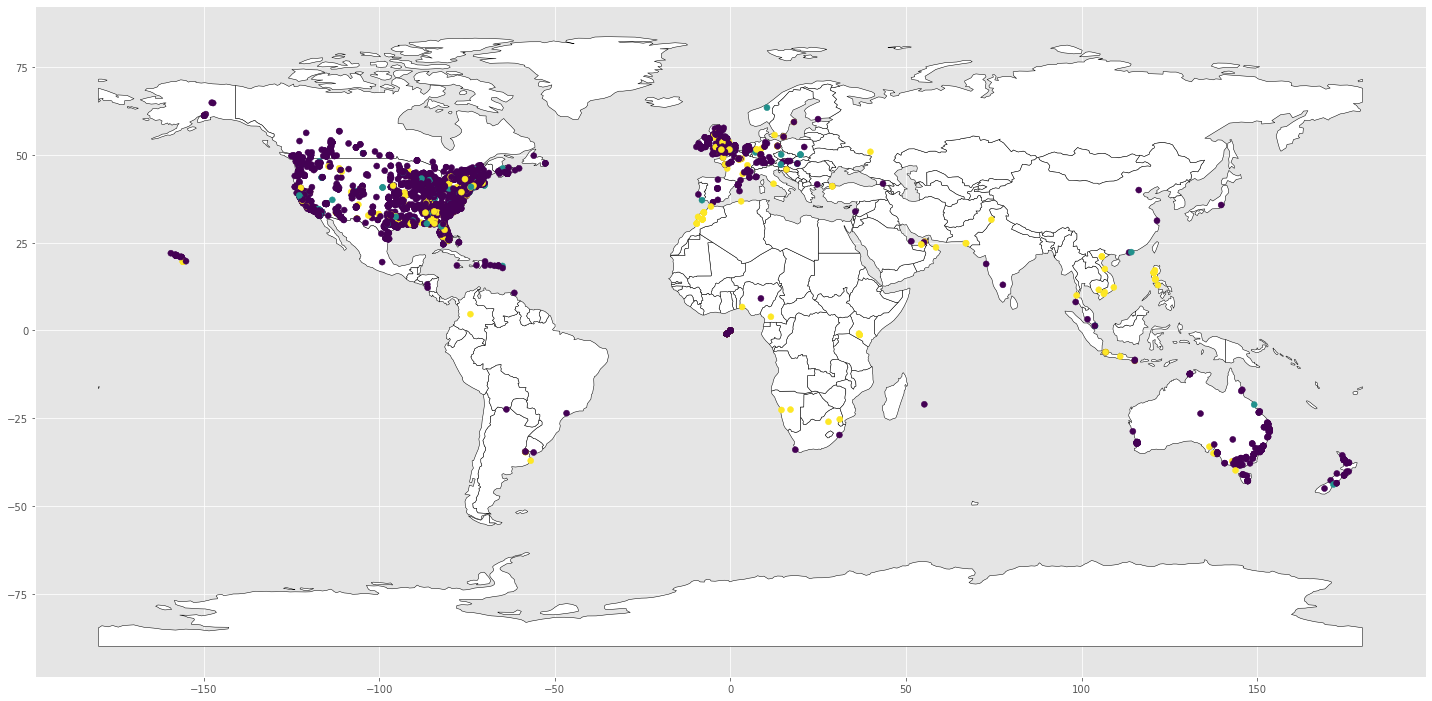

In [8]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot(figsize = (15,10))

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.venue_longitude, df.venue_latitude))

ax = world.plot(color='white', edgecolor='black', figsize = (20,10))


gdf.plot(ax=ax,c=df['Fraud'], legend=True)

plt.tight_layout()
plt.savefig('images/world.png', dpi= 300)
plt.show()


In [169]:
main_df['venue_country'].value_counts()

US    8336
GB    1838
CA    1134
       876
AU     683
      ... 
SK       1
QA       1
CZ       1
JP       1
CY       1
Name: venue_country, Length: 69, dtype: int64

In [216]:
# previous payout = col 30
# ticket type= col 34
newdf.iloc[0,30]

[]

In [60]:
df = helper.prep_df(main_df)
df.head()

approx_payout_date  body_length  channels  country  currency  \
0          1266062400         3852         5       66         6   
1          1296720000         3499         0       66         6   
2          1296172800         2601         8       66         6   
3          1388966400        12347         6       31         2   
4          1297900800         2417        11       66         6   

   delivery_method  email_domain  event_created   event_end  event_published  \
0              0.0          2084     1262739706  1265630400     1.263110e+09   
1              1.0          4220     1293832670  1296288000     1.293833e+09   
2              1.0          4015     1291090956  1295740800     1.291092e+09   
3              1.0          2524     1360681570  1388534400     1.360683e+09   
4              0.0           444     1291994666  1297468800     1.291995e+09   

   ...  user_created  user_type  venue_address  venue_country  venue_latitude  \
0  ...    1259613950          1           7479             64       25.777471   
1  ...    1280942776          3              0             64       32.776566   
2  ...    1272559388          3            451             64       33.944201   
3  ...    1283870102          3              0             -1       -1.000000   
4  ...    1288984065          3           9530             64       42.353848   

   venue_longitude  venue_name  venue_state  prev_payout_count  Fraud  
0       -80.133433        3832          126                  0      2  
1       -79.930922        7878          337                 49      0  
2      -118.080419        4631           51                 36      0  
3        -1.000000          -1           -1                 21      0  
4       -71.044276        2819          213                 49      0  

[5 rows x 39 columns]

0    12373
2     1293
1      671
Name: Fraud, dtype: int64


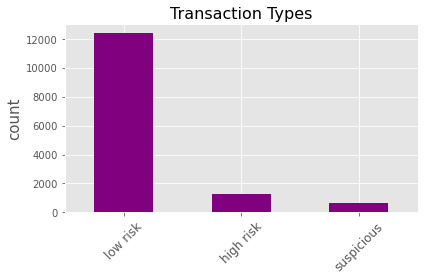

In [63]:
print(df.Fraud.value_counts())
df.Fraud.value_counts().plot(kind='bar', color = 'purple')
#plt.xlabel('transaction', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(np.arange(3), ['low risk', 'high risk', 'suspicious'],fontsize=12, rotation = 45)
plt.title('Transaction Types', fontsize=16)
plt.tight_layout()
plt.savefig('transactions', dpi= 300)

In [224]:
#df['acct_type'].unique()
#df.columns
#df.groupby('acct_type').count()
#df.describe()
#df.info()
#pd.set_option('display.max_columns', None)

[0.18922791 0.10473989 0.08432686]
           pc_1      pc_2      pc_3  label
0     -0.408631  0.350914  0.115447      2
1     -0.587971  0.337779  0.275588      0
2     -0.599348  0.860805 -0.113696      0
3      0.948825  0.957080  0.385484      0
4     -0.560526  0.636746  0.461852      0
...         ...       ...       ...    ...
14332 -0.264929 -0.104474 -0.579228      2
14333 -0.526190  0.576533 -0.154441      0
14334 -0.062830 -0.619541  0.438403      0
14335 -0.448208 -0.211909 -0.103143      1
14336  0.546047 -0.434524 -0.413913      2

[14337 rows x 4 columns]


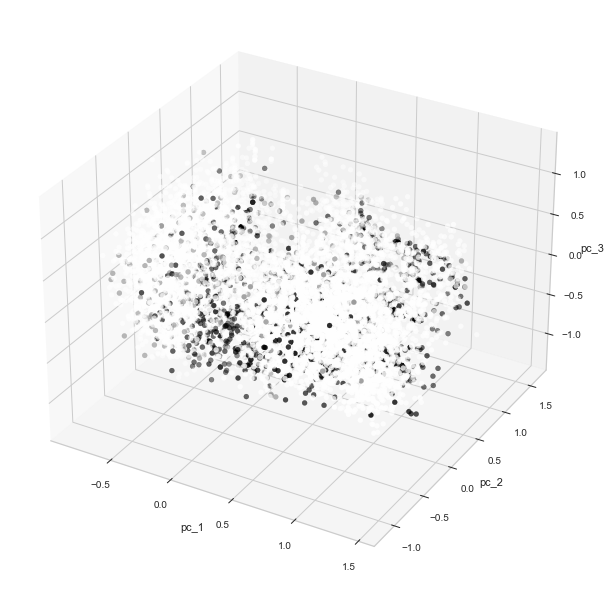

In [340]:
helper.show_pca_df(df)

[0.18922791 0.10473989 0.08432686]
           pc_1      pc_2      pc_3  label
0     -0.408632  0.350891  0.115595      2
1     -0.587971  0.337748  0.275619      0
2     -0.599348  0.860845 -0.113817      0
3      0.948825  0.957065  0.385476      0
4     -0.560526  0.636778  0.461793      0
...         ...       ...       ...    ...
14332 -0.264930 -0.104579 -0.579044      2
14333 -0.526189  0.576574 -0.154646      0
14334 -0.062828 -0.619509  0.438163      0
14335 -0.448207 -0.211969 -0.103098      1
14336  0.546047 -0.434468 -0.413963      2

[14337 rows x 4 columns]


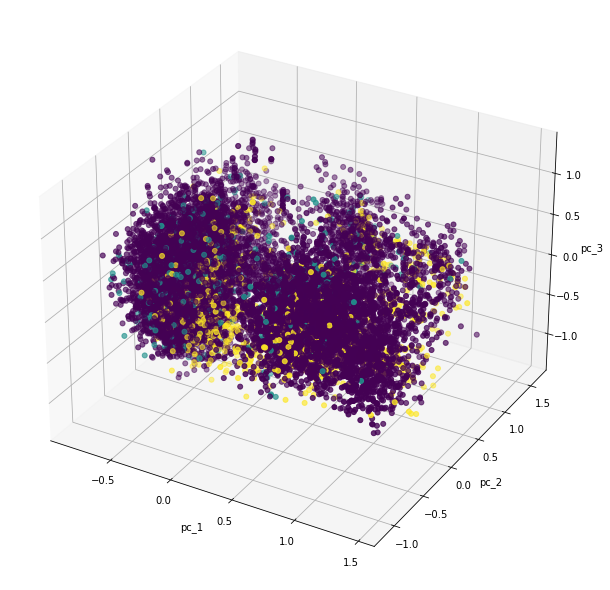

In [259]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def show_pca_df(df):
    x = df[df.columns[0:-1]].to_numpy()
    y = df[df.columns[-1]].to_numpy()

    x = sklearn.preprocessing.MinMaxScaler().fit_transform(x)
    pca = sklearn.decomposition.PCA(n_components=3)
    pca_result = pca.fit_transform(x)
    print(pca.explained_variance_ratio_)

    pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
    pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)
    print(pca_df)

    ax = Axes3D(plt.figure(figsize=(8, 8)))
    ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
    ax.set_xlabel("pc_1")
    ax.set_ylabel("pc_2")
    ax.set_zlabel("pc_3")
    #plt.legend()
    plt.show()


show_pca_df(df)

In [100]:
df_anomaly.shape, df_anomaly.size

((1293, 28), 36204)

[0.18384996 0.10970751 0.09700078]
          pc_1      pc_2      pc_3  label
0    -0.288010 -0.480919  0.154765      2
1    -0.587329 -0.137900  0.410537      1
2    -0.325864 -0.600325  0.542791      2
3    -0.460604 -0.225863  0.226493      1
4    -0.564069 -0.685461 -0.137232      2
...        ...       ...       ...    ...
2959  0.224454 -0.043934  0.247592      0
2960 -0.444437 -0.379212  0.216646      0
2961 -0.639536 -0.073235 -0.148869      0
2962  0.178885  0.131570  0.152538      0
2963 -0.531429 -0.531924 -0.145368      0

[2964 rows x 4 columns]


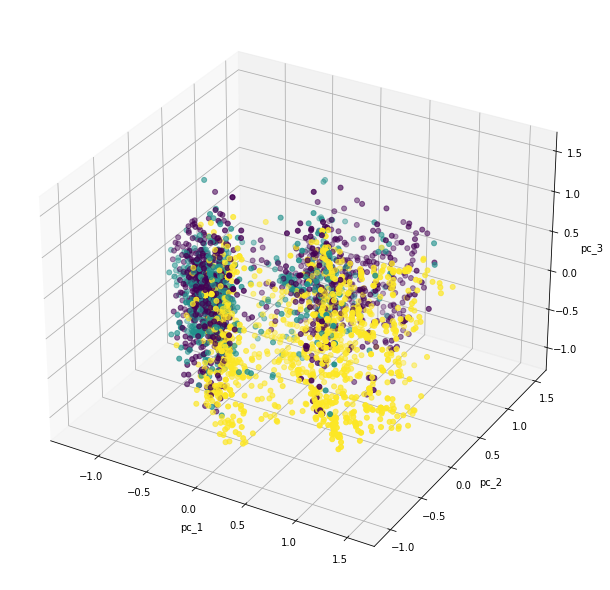

In [260]:
df_anomaly = df[df[df.columns[-1]] > 0]
df_normal = df[df[df.columns[-1]] == 0].sample(n=1000, random_state=1, axis='index')
df_2 = pd.concat([df_anomaly, df_normal])

show_pca_df(df_2)

In [ ]:
#class_weight= 'balanced'

In [11]:
df.shape

(14337, 39)

In [15]:
df.columns

Index(['approx_payout_date', 'body_length', 'channels', 'country', 'currency',
       'delivery_method', 'email_domain', 'event_created', 'event_end',
       'event_published', 'event_start', 'fb_published', 'gts',
       'has_analytics', 'has_header', 'has_logo', 'name_length', 'num_order',
       'num_payouts', 'object_id', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'sale_duration', 'sale_duration2',
       'show_map', 'user_age', 'user_created', 'user_type', 'venue_address',
       'venue_country', 'venue_latitude', 'venue_longitude', 'venue_name',
       'venue_state', 'prev_payout_count', 'Fraud'],
      dtype='object')

In [16]:
X_train,X_test, y_train, y_test =  helper.split_df(df, 'Fraud')

In [17]:
X_train.shape

(10752, 38)

In [21]:
# Save the X_test as a csv file:
X_test.to_csv('data/x-test.csv')


In [22]:
X_test.shape

(3585, 38)

In [45]:
# Creating a dataframe with 3%
# values of original dataframe
part_3 = X_test.sample(frac = 0.005)
part_3.head()
part_3.to_csv('data/app_input.csv', index=False)
# Creating dataframe with 
# rest of the 50% values
#rest_part_50 = df.drop(part_50.index)
  

In [18]:
rf= model.random_forest_model(X_train, y_train)
preds= rf.predict(X_test)

print(recall_score(y_test, preds, average='micro'))


0.9456066945606695


In [44]:
rf.predict(part_3).tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]

In [343]:
print(confusion_matrix(y_test, preds))

[[3099    0    2]
 [  34  129    2]
 [   7    0  312]]


In [19]:
rf.predict_proba(X_test.iloc[0:1, :])

array([[0.93, 0.04, 0.03]])

In [20]:
rf.predict(X_test.iloc[0:1,:])

array([0])

In [50]:
del_= part_3.copy()
del_['f'] = rf.predict(part_3).tolist()
del_.shape

(18, 39)

In [58]:
for row in del_.itertuples():
    print(row.country)

66
66
66
66
66
10
66
66
66
66
66
42
66
66
66
10
66
66


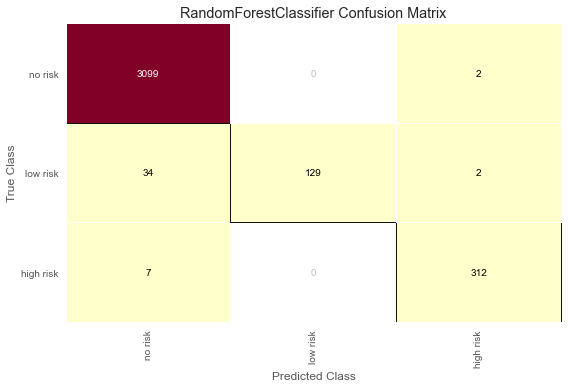

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [356]:
from yellowbrick.classifier import ConfusionMatrix
model = rf
classes = ['no risk', 'low risk', 'high risk']

cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'no risk', 1: 'low risk', 2: 'high risk'}
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
#plt.tight_layout()
plt.savefig('images/table1.png', dpi= 300)
cm.show()


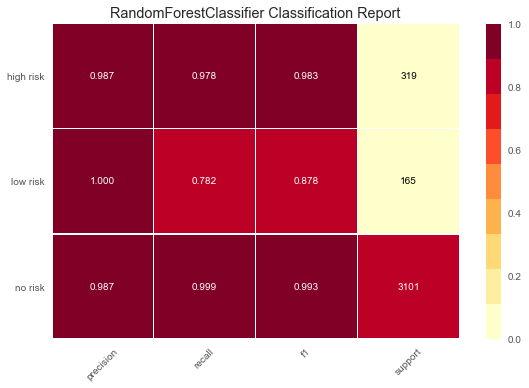

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [357]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
#plt.tight_layout()
plt.savefig('images/table2.png', dpi= 300)
visualizer.show()                       # Finalize and show the figure

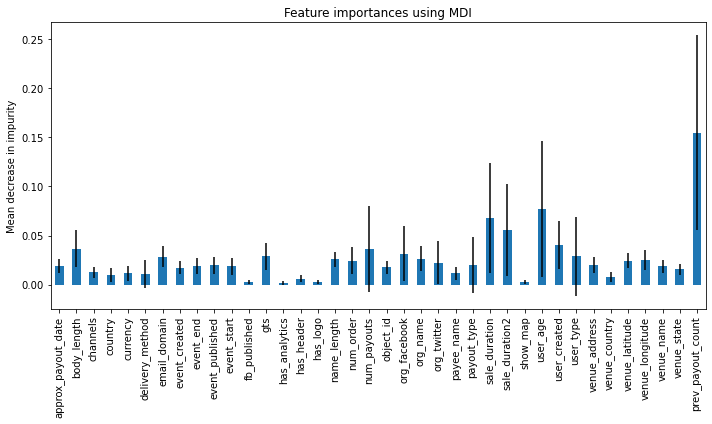

In [258]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots(figsize = (10,6))
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [330]:
#import pickle
#model = rf
## save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(model, open(filename, 'wb'))


# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

0.9500697350069734


## Load the saved model

In [381]:
with open('src/model.pkl', 'rb') as f:
    model = pickle.load(f)

model.predict_proba(X_test.iloc[0:1, :])

array([[1., 0., 0.]])

## MONGODB

In [376]:
# Connect to the hosted MongoDB instance 
client = MongoClient('localhost', 27017)

# create or access already existing database
db = client['fraud'] 

# collection transaction (the same as tables in SQL) >>>> Field is the same as column and document equals row
transactions = db['transactions'] 

for 
transactions.insert_one({"X":X, 'prediction': prediction})

db.list_collection_names()



[]


## STUFF

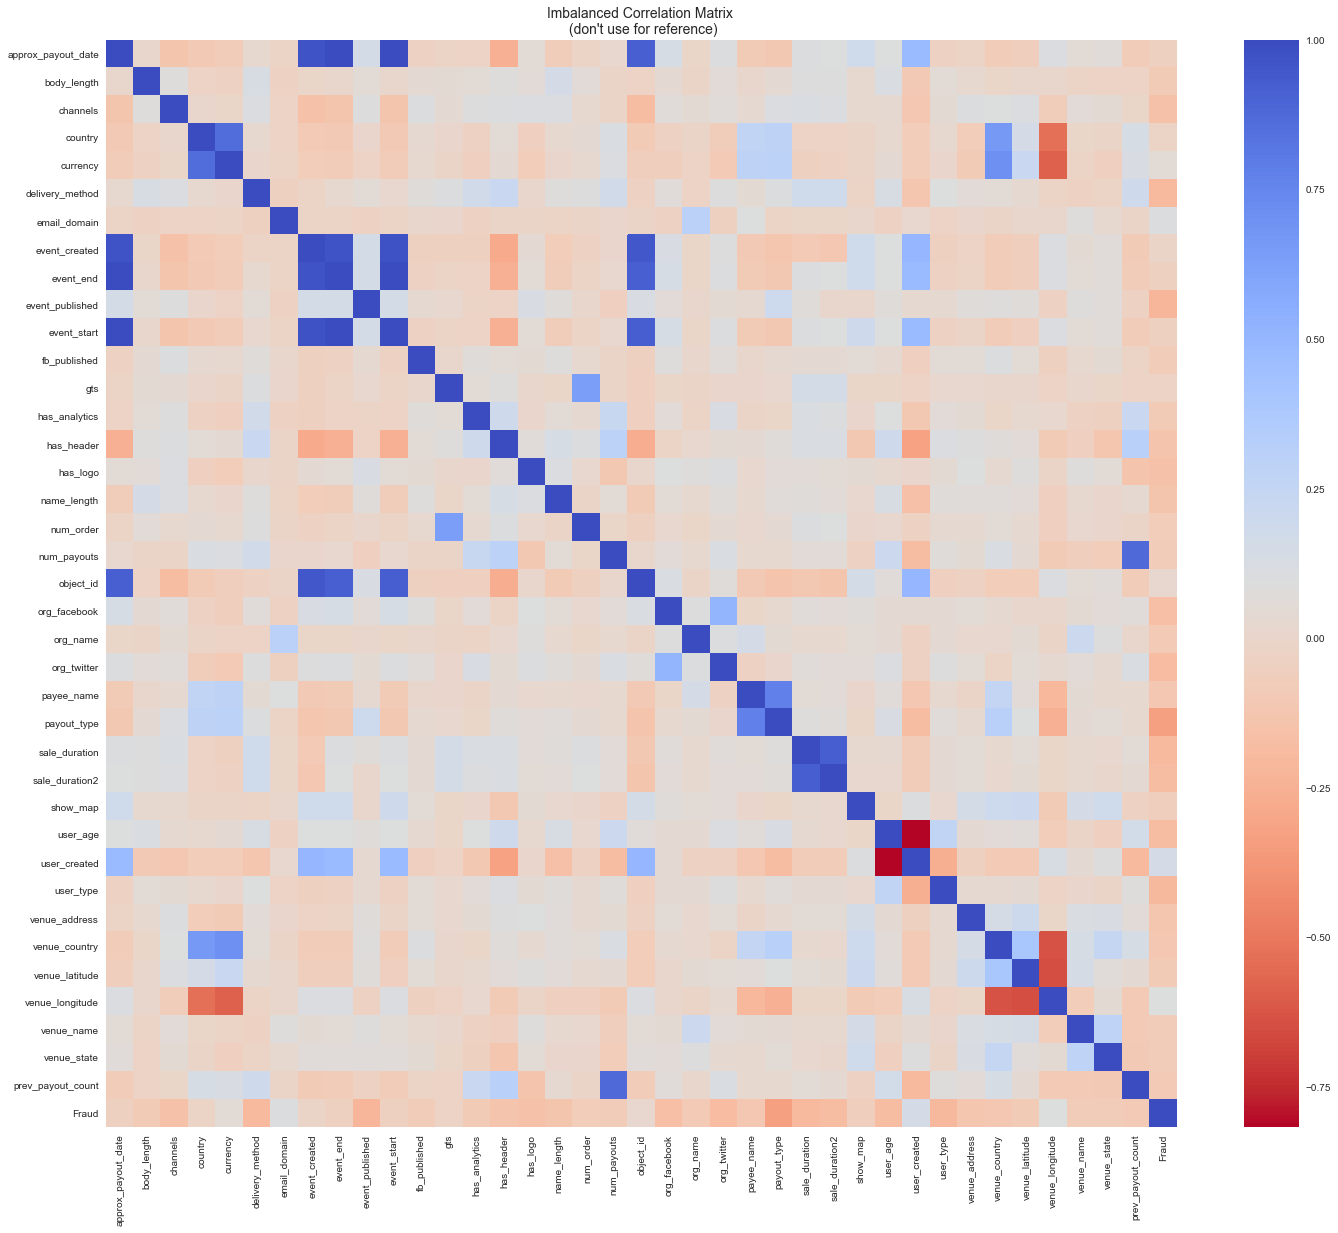

In [293]:
import seaborn as sns

f, ax1 = plt.subplots(figsize=(24,20))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


#sub_sample_corr = new_df.corr()
#sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
#ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [341]:
df.corr()

approx_payout_date  body_length  channels   country  \
approx_payout_date            1.000000     0.012119 -0.132407 -0.101650   
body_length                   0.012119     1.000000  0.079067 -0.025241   
channels                     -0.132407     0.079067  1.000000  0.007282   
country                      -0.101650    -0.025241  0.007282  1.000000   
currency                     -0.082596    -0.033986 -0.005223  0.864228   
delivery_method               0.020579     0.133887  0.112622  0.025502   
email_domain                 -0.019366    -0.039502 -0.022314 -0.022302   
event_created                 0.971428    -0.007857 -0.156087 -0.095893   
event_end                     1.000000     0.012119 -0.132408 -0.101650   
event_published               0.161520     0.049557  0.090992  0.004427   
event_start                   0.993599     0.010634 -0.132755 -0.101816   
fb_published                 -0.042300     0.040859  0.105567  0.030575   
gts                          -0.015375     0.046967  0.041621  0.005220   
has_analytics                -0.027188     0.052031  0.085005 -0.035618   
has_header                   -0.252599     0.081858  0.105104  0.049914   
has_logo                      0.049874     0.059343  0.109109 -0.054955   
name_length                  -0.065090     0.152534  0.111930  0.022424   
num_order                    -0.020166     0.056484  0.023223  0.037960   
num_payouts                   0.013977    -0.013551 -0.009769  0.116584   
object_id                     0.921529    -0.023330 -0.178616 -0.090635   
org_facebook                  0.138939     0.037683  0.067182 -0.032411   
org_name                     -0.001152    -0.014747  0.041851 -0.011884   
org_twitter                   0.100211     0.062413  0.065935 -0.066645   
payee_name                   -0.090626     0.010792  0.029993  0.263979   
payout_type                  -0.112469     0.036929  0.108034  0.289783   
sale_duration                 0.099286     0.085554  0.117689 -0.026861   
sale_duration2                0.093127     0.086428  0.110410 -0.026378   
show_map                      0.178705     0.023452  0.024795 -0.008375   
user_age                      0.096934     0.117866  0.028107  0.024255   
user_created                  0.478025    -0.107214 -0.114858 -0.076649   
user_type                    -0.038313     0.055118  0.043678  0.022989   
venue_address                -0.018251     0.025356  0.102149 -0.075718   
venue_country                -0.084222    -0.007336  0.092806  0.662871   
venue_latitude               -0.058686     0.010983  0.107046  0.150233   
venue_longitude               0.109745     0.006486 -0.068957 -0.527712   
venue_name                    0.051029    -0.015250  0.060114 -0.001195   
venue_state                   0.065116    -0.029098  0.045038 -0.012348   
prev_payout_count            -0.081031    -0.025026 -0.003009  0.135614   
Fraud                        -0.047956    -0.092185 -0.153231 -0.017124   

                    currency  delivery_method  email_domain  event_created  \
approx_payout_date -0.082596         0.020579     -0.019366       0.971428   
body_length        -0.033986         0.133887     -0.039502      -0.007857   
channels           -0.005223         0.112622     -0.022314      -0.156087   
country             0.864228         0.025502     -0.022302      -0.095893   
currency            1.000000         0.001683     -0.019307      -0.073186   
delivery_method     0.001683         1.000000     -0.049957      -0.019362   
email_domain       -0.019307        -0.049957      1.000000      -0.018193   
event_created      -0.073186        -0.019362     -0.018193       1.000000   
event_end          -0.082596         0.020579     -0.019366       0.971428   
event_published    -0.028109         0.049422     -0.033758       0.159031   
event_start        -0.082555         0.018521     -0.018589       0.976971   
fb_published        0.024150         0.072953      0.007630      -0.047690   
gts  

## Antoencoders 

In [304]:
df.head()

approx_payout_date  body_length  channels  country  currency  \
0          1266062400         3852         5       66         6   
1          1296720000         3499         0       66         6   
2          1296172800         2601         8       66         6   
3          1388966400        12347         6       31         2   
4          1297900800         2417        11       66         6   

   delivery_method  email_domain  event_created   event_end  event_published  \
0              0.0          2084     1262739706  1265630400     1.263110e+09   
1              1.0          4220     1293832670  1296288000     1.293833e+09   
2              1.0          4015     1291090956  1295740800     1.291092e+09   
3              1.0          2524     1360681570  1388534400     1.360683e+09   
4              0.0           444     1291994666  1297468800     1.291995e+09   

   event_start  fb_published      gts  has_analytics  has_header  has_logo  \
0   1265594400             0     0.00              0         1.0         0   
1   1296255600             0   868.02              0         0.0         1   
2   1295713800             0  3500.00              0        -1.0         0   
3   1360702800             0  1167.35              0         0.0         1   
4   1297440000             1  2313.15              0         0.0         0   

   name_length  num_order  num_payouts  object_id  org_facebook  org_name  \
0           60          0            0     527017           0.0      6069   
1           27         23            1     786878           0.0      6422   
2           28         19            4     787337           0.0      8707   
3           21         39           16     885645           0.0         0   
4           66         30            0    1114349           0.0       669   

   org_twitter  payee_name  payout_type  sale_duration  sale_duration2  \
0          0.0           0            0           29.0              33   
1         12.0        1722            2           28.0              28   
2          0.0        2290            2           54.0              54   
3          0.0           0            1            0.0               0   
4          0.0         182            2           63.0              63   

   show_map  user_age  user_created  user_type  venue_address  venue_country  \
0         1        36    1259613950          1           7479             64   
1         0       149    1280942776          3              0             64   
2         0       214    1272559388          3            451             64   
3         0       889    1283870102          3              0             -1   
4         0        35    1288984065          3           9530             64   

   venue_latitude  venue_longitude  venue_name  venue_state  \
0       25.777471       -80.133433        3832          126   
1       32.776566       -79.930922        7878          337   
2       33.944201      -118.080419        4631           51   
3       -1.000000        -1.000000          -1           -1   
4       42.353848       -71.044276        2819          213   

   prev_payout_count  Fraud  
0                  0      2  
1                 49      0  
2                 36      0  
3                 21      0  
4                 49      0

In [320]:
from sklearn import preprocessing
from sklearn import model_selection
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers , activations, losses, optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping


normal_events = df[df['Fraud'] == 0]
abnormal_events = df[df['Fraud'] != 0]
normal_events = normal_events.loc[:, normal_events.columns != 'Fraud']
abnormal_events = abnormal_events.loc[:, abnormal_events.columns != 'Fraud']

# scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(df.iloc[:,:-1])

scaled_data = scaler.transform(normal_events)

# 80% percent of dataset is designated to training
train_data, test_data = model_selection.train_test_split(scaled_data, test_size=0.2)

n_features = abnormal_events.shape[1]

# model
encoder = Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=20, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=10, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

decoder = Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=10, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=20, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.softmax))

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(
	loss=losses.MSE,
	optimizer=optimizers.Adam(),
	metrics=[metrics.mean_squared_error])

# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=20, restore_best_weights=True)
history = autoencoder.fit(x=train_data, y=train_data, epochs=100, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/100
289/310 [==========================>...] - ETA: 0s - loss: 0.2687 - mean_squared_error: 0.2687

ValueError: in user code:

    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1323 test_function  *
        return step_function(self, iterator)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1307 run_step  **
        outputs = model.test_step(data)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1266 test_step
        y_pred = self(x, training=False)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_5 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 38) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 38) dtype=float32>]
